# Test of alignment scores and functions for the attention mechanism

How do the different scores differ? What are advantages, disadvantages?

A first test only.

In [3]:
# test alignment functions
import numpy as np

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

def fscore(x, y, mthd='dot', w=np.ones((1,1))):
    '''compute alignment score for attention'''
    if mthd == 'dot':
        return x.dot(y.T)
    elif mthd == 'wght':
        return x.dot(w.dot(y.T))
    elif mthd == 'tanh':
        return np.tanh(x.dot(w.dot(y.T)))
    elif mthd == 'euc':
        return 1 - np.linalg.norm(x-y)
    elif mthd == 'ent':
        return x.dot(np.log(1+y))
    else:
        return np.zeros_like(x)

if __name__ == "__main__":
    a0 = np.array([.1, .1, .5])
    a1 = np.array([.1, .5, .1])
    print('score dot: ', fscore(a0, a1, 'dot'))
    print('align dot: ', softmax(fscore(a0, a1, 'dot')))
    #w0 = np.random.random((3,3))
    w0 = np.array([[1, 1, -1], [1, -1, 1], [-1, 1, 1]])
    print('score weighted: ', fscore(a0, a1,'wght', w0))
    print('align weighted: ', softmax(fscore(a0, a1,'wght', w0)))
    print('score tanh: ', fscore(a0, a1,'tanh', w0))
    print('align tanh: ', softmax(fscore(a0, a1,'tanh', w0)))
    print('score euclidean: ', fscore(a0, a1, 'euc'))
    print('align euclidean: ', softmax(fscore(a0, a1, 'euc')))
    print('score entr: ', fscore(a0, a1, 'ent'))
    print('align entr: ', softmax(fscore(a0, a1, 'ent')))

score dot:  0.11000000000000001
align dot:  1.0
score weighted:  0.27
align weighted:  1.0
score tanh:  0.26362483547220333
align tanh:  1.0
score euclidean:  0.4343145750507619
align euclidean:  1.0
score entr:  0.0977326186934114
align entr:  1.0


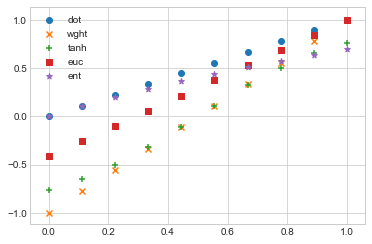

In [4]:
# test alignment functions
import numpy as np
import matplotlib.pyplot as plt

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

def fscore(x, y, mthd='dot', w=np.ones((1,1))):
    '''compute alignment score for attention'''
    if mthd == 'dot':
        return x.dot(y.T)
    elif mthd == 'wght':
        return x.dot(w.dot(y.T))
    elif mthd == 'tanh':
        return np.tanh(x.dot(w.dot(y.T)))
    elif mthd == 'euc':
        return 1 - np.linalg.norm(x-y)
    elif mthd == 'ent':
        return x.dot(np.log(1+y))
    else:
        return np.zeros_like(x)

if __name__ == "__main__":
    plt.style.use('seaborn-whitegrid')
    a0 = np.array([1, 0])
    x = np.linspace(0, 1, 10)
    y0 = []
    y1 = []
    y2 = []
    y3 = []
    y4 = []
    #w0 = np.random.random((2,2))
    w0 = np.array([[1, -1], [-1, 1]])
    for xv in x:
        a1 = np.array([xv, 1. - xv])
        y0.append(fscore(a0, a1, 'dot'))
        y1.append(fscore(a0, a1, 'wght', w0))
        y2.append(fscore(a0, a1, 'tanh', w0))
        y3.append(fscore(a0, a1, 'euc', w0))
        y4.append(fscore(a0, a1, 'ent', w0))
    plt.scatter(x, y0, marker='o', label='dot')
    plt.scatter(x, y1, marker='x', label='wght')
    plt.scatter(x, y2, marker='+', label='tanh')
    plt.scatter(x, y3, marker='s', label='euc')
    plt.scatter(x, y4, marker='*', label='ent')
    plt.legend()
    plt.show()
    #print(y0)